In [1]:
# Exercise 3: Quadratic Programming

In [2]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Feb 17 02:55:24 PM: Your problem has 2 variables, 4 constraints, and 0 parameters.
(CVXPY) Feb 17 02:55:24 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 17 02:55:24 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 17 02:55:24 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Feb 17 02:55:24 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 17 02:55:24 PM: Compiling problem (target solver=ECOS).
(CVXP

/Users/leonardopedroso/Documents/Research/Teaching/4DM20 EngOpt/2025/Computer Assignments/ComputerAssignment2/ComputerAssignment2.withSolutions/python/.venv/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


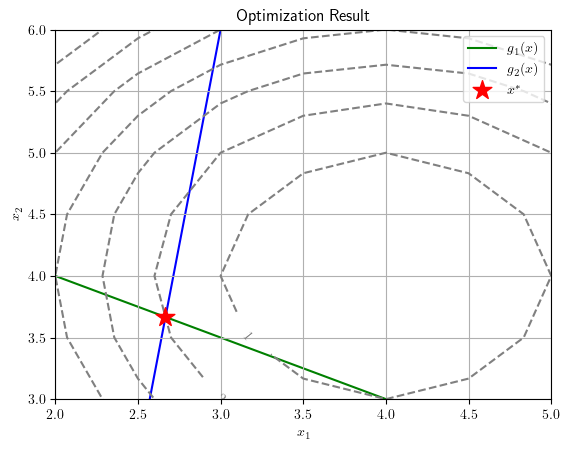

In [3]:
# Optimization variables
x1 = cp.Variable(1)
x2 = cp.Variable(1)

# Define constraints
constraints = [
    x1 + 2*x2 <= 10,
    7*x1 - x2 <= 15,
    x1 >= 0,
    x2 >= 0]

# Define objective
objective = (x1 - 4) ** 2 + (x2 - 4) ** 2

# Solve problem
problem = cp.Problem(cp.Minimize(objective), constraints)
problem.solve(solver=cp.ECOS, verbose=True)

# Print optimal values of x1 and x2
print("Optimal value of x1:", x1.value)
print("Optimal value of x2:", x2.value)

# Plotting
x1vector = np.arange(0, 10.5, 0.5)
x2vector = np.arange(0, 10.5, 0.5)
X1, X2 = np.meshgrid(x1vector, x2vector)
Z = (X1-4)**2+(X2-4)**2

plt.figure()
# Objective function contour
fx=plt.contour(X1, X2, Z, levels=np.arange(0, 10.5, 1), linestyles='--', colors='grey')
plt.clabel(fx, inline=1, fontsize=10) #Places values of f at the lines
plt.plot(x1vector, 5 - x1vector / 2, 'green', label='$g_1(x)$', zorder=1)
plt.plot(x1vector, 7 * x1vector - 15, 'b', label='$g_2(x)$', zorder=1)
# Optimal point
plt.scatter(x1.value, x2.value, color='r', marker='*', s=200, label='$x^*$', zorder=2)
plt.xlim([2, 5])
plt.ylim([3, 6])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Optimization Result')
plt.legend()
plt.grid(True)
plt.show()
